In [2]:
from turkish_morphology import decompose, analyze

word = "kitaplarımızdaki"
word = "yapamadıklarımızdan"
sentence = "Yazarın kitaplarını yayın hakkını elinde bulunduran Aziz Nesin Vakfı'ndan yapılan açıklamaya göre,ilki 1946 yılında basılan Aziz Nesin'in kitapları, o dönemden bu yana 10 milyon 780 bin adet basıldı ve dağıtıldı"
word = "dersindeyim"

analyses = analyze.surface_form(word, use_proper_feature=False)
decomposition = decompose.human_readable_analysis(analyses[0])

analyses
# decomposition

['(de[VB]+[Polarity=Pos])([VN]-r[Derivation=AorNom]+[PersonNumber=A3sg]+[Possessive=Pnon]+[Case=Bare])([NOMP]-sH[Derivation=Sim]+[PersonNumber=A3sg]+Hn[Possessive=P2sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])',
 '(ders[NOMP]+[PersonNumber=A3sg]+Hn[Possessive=P2sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])',
 '(ders[NOMP]+[PersonNumber=A3sg]+SH[Possessive=P3sg]+NDA[Case=Loc]+[Copula=PresCop]+YHm[PersonNumber=V1sg])']

In [3]:
from morphology import decompose_tr

decomposition = decompose_tr(word)
decomposition

[Decomposition(root=ders, pos=NOMP, meta_morphemes=['SH', 'NDA', 'YHm'], morphemes=['i', 'nde', 'yim']),
 Decomposition(root=ders, pos=NOMP, meta_morphemes=['Hn', 'NDA', 'YHm'], morphemes=['in', 'de', 'yim']),
 Decomposition(root=de, pos=NOMP, meta_morphemes=['r', 'sH', 'Hn', 'NDA', 'YHm'], morphemes=['r', 'si', 'n', 'de', 'yim']),
 Decomposition(root=de, pos=NOMP, meta_morphemes=['r', 'sH', 'Hn', 'NDA', 'YHm'], morphemes=['r', 'si', 'n', 'de', 'yim'])]

In [ ]:
import pandas as pd

data = pd.read_csv("data/bilkent-turkish-writings/bilkent-turkish-writings-dataset.csv")
data.head()

In [ ]:
import re
from utils import write_json

essays = []

for i, row in data.iterrows():
    if isinstance(row["text"], str):
        raw_texts = re.split("[.?!]\s",row["text"].replace("\r\n", ""))
        texts = []

        for text in raw_texts:
            texts.extend(re.split("\s\s\s\s", text))

        texts = [re.sub("^[A-ZÜÖĞIŞÇİ0-9\-\s.]+$", "", text) for text in texts]
        texts = [re.sub("\s+", " ", text).strip() for text in texts if all(["http" not in text.lower(), "kaynakça" not in text.lower()]) and len(text.strip().split()) > 5]
        
        if len(texts) > 1:
            essays.append({
                "id": f"bilkent-turkish-writings-{i}",
                "sentences": texts
            })

write_json(essays, "data/bilkent-turkish-writings/bilkent-turkish-writings-dataset.json", ensure_ascii=False)


In [ ]:
from morphology import decompose_tr

# decompose_tr("heykelciklerinin")
[decomposition.to_json() for decomposition in decompose_tr("yansıttığımızın")]

In [ ]:
from utils import read_json

data = read_json("../data/bilkent-turkish-writings/bilkent-turkish-writings-dataset_prep.json")

In [ ]:
len(data), sum([len(val) for val in data.values()])

In [ ]:
sum([1 for root, word_map in data.items() for word, decompositions in word_map.items() if len(decompositions) == 1 and decompositions[0]["morphemes"]])

In [ ]:
from utils import write_json
import pathlib

pathlib.Path("../data/bilkent-turkish-writings/batches").mkdir(parents=True, exist_ok=True)
i = 0
while True:
    data_chunk = list(data.items())[i*500:(i+1)*500]
    if data_chunk:
        write_json(dict(data_chunk), f"../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_{i}.json", ensure_ascii=False)
        i += 1
    else:
        break

In [1]:
from utils import write_json
from prepare_data_for_morph import post_morph_process

new_data = post_morph_process("../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_0.json")

write_json(new_data, "../data/bilkent-turkish-writings/batches/bilkent-turkish-writings-dataset_prep_0_new.json", ensure_ascii=False)

In [2]:
from src.utils import read_json, write_json

data = read_json("../data/bilkent-turkish-writings/btwd_prep.json")

output_data = {
    "metadata": {
        "source": "../data/bilkent-turkish-writings/btwd.json",
        "processor": "tr_btwd_prep",
        "language": "tr"
    },
    "data": data
}
write_json(output_data, "../data/bilkent-turkish-writings/btwd_prep.json", ensure_ascii=False)

In [ ]:
from src.utils import read_json, write_json

data = read_json("outputs/gpt-3.5/tr/btwd/btwd_prep_post_morph_sample_llm_morph_gen_en_one_shot_gpt-3.5-turbo_2094783b7ba0.json")
write_json(data, "outputs/gpt-3.5/tr/btwd/btwd_prep_post_morph_sample_llm_morph_gen_en_one_shot_gpt-3.5-turbo_2094783b7ba0.json", ensure_ascii=False)

In [3]:
import pandas as pd

data = pd.read_excel("../data/MorphoLEX_en.xlsx", sheet_name="0-1-2")

/Users/mismayil/.pyenv/versions/3.9.7/envs/til/lib/python3.9/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Unknown extension is not supported and will be removed
  warn(msg)


In [4]:
data.head()

,ELP_ItemID,Word,POS,Nmorph,PRS_signature,MorphoLexSegm,ROOT1_PFMF,ROOT1_FamSize,ROOT1_Freq_HAL,SUFF1_PFMF,...,SUFF1_Freq_HAL,SUFF1_length,SUFF1_P,SUFF1_P*,SUFF2_PFMF,SUFF2_FamSize,SUFF2_Freq_HAL,SUFF2_length,SUFF2_P,SUFF2_P*
0,4,algebraical,JJ,3,"0,1,2",{(algebra)}>ic>>al>,100.0,4,3692,88.450148,...,1472797,2,0.000028,0.006334,91.538462,1431,4704731,2,0.000009,0.006643
1,61,allowably,RB,3,"0,1,2",{(allow)}>able>>y>,100.0,5,185956,88.978186,...,1227992,4,0.000032,0.006025,73.641851,2486,3870233,1,0.000050,0.029816
2,69,allusively,RB,3,"0,1,2",{(allude)}>ive>>ly>,100.0,4,2066,92.746114,...,1037354,3,0.000017,0.002781,80.980324,2898,3857999,2,0.000045,0.026726
3,94,alphabetically,RB,3,"0,1,2",{(alphabet)}>al>>ly>,50.0,5,6877,30.279720,...,4704731,2,0.000009,0.006643,13.496721,2898,3857999,2,0.000045,0.026726
4,116,altercations,NN,3,"0,1,2",{(alterc)>ate>}>ion>,0.0,2,187,56.623932,...,2569118,3,0.000026,0.010505,58.322904,1599,6530204,3,0.000009,0.009115


In [6]:
words = []

for i, row in data.iterrows():
    word = row["Word"]
    segmentation = row["MorphoLexSegm"]
    morphemes = re.findall(r"[A-Za-z]+", segmentation)
    if word == "".join(morphemes):
        words.append({
            "word": word,
            "morphemes": morphemes
        })

In [8]:
words[:10]

[{'word': 'algebraical', 'morphemes': ['algebra', 'ic', 'al']},
 {'word': 'altruistic', 'morphemes': ['altru', 'ist', 'ic']},
 {'word': 'amateurishly', 'morphemes': ['amateur', 'ish', 'ly']},
 {'word': 'ambassadorship', 'morphemes': ['ambassad', 'or', 'ship']},
 {'word': 'ambitiousness', 'morphemes': ['ambit', 'ious', 'ness']},
 {'word': 'woodenly', 'morphemes': ['wood', 'en', 'ly']},
 {'word': 'woodenness', 'morphemes': ['wood', 'en', 'ness']},
 {'word': 'wordlessly', 'morphemes': ['word', 'less', 'ly']},
 {'word': 'workableness', 'morphemes': ['work', 'able', 'ness']},
 {'word': 'worthlessly', 'morphemes': ['worth', 'less', 'ly']}]

In [5]:
import re

s = "{(algebra)}>ic>>al>"
matches = re.findall(r"[A-Za-z]+", s)
print(matches)

['algebra', 'ic', 'al']


In [3]:
from src.utils import read_json, write_json

data = read_json("experiments/data/en/morpholex/MorphoLEX_en_prep_morph_sample_nonce.json")

for i, sample in enumerate(data["data"]):
    sample["id"] = f"morpholex-ood-{i}"

write_json(data, "experiments/data/en/morpholex/MorphoLEX_en_prep_morph_sample_nonce.json", ensure_ascii=False)

In [1]:
from src.utils import read_json, write_json

data = read_json("experiments/data/tr/btwd/btwd_prep_post_comp_morph_sample_nonce.json")

for i, sample in enumerate(data["data"]):
    sample["id"] = f"tr-ood-{i}"

write_json(data, "experiments/data/tr/btwd/btwd_prep_post_comp_morph_sample_nonce.json", ensure_ascii=False)

In [4]:
import networkx as nx

G = nx.MultiDiGraph(root=False)
G.add_node("gel", id=1, root=True)
G.add_node("yap", id=2, root=True)
G.add_node("DH", id=3)
G.add_node("lAr", id=4)
G.add_node("mHs", id=5)

In [5]:
G.add_edges_from([("gel", "DH", {"route": "1-3", "key": "di"}), ("DH", "lAr", {"route": "1-3-4", "key": "ler"}), ("yap", "DH", {"route": "2-3", "surface": "ti"}), ("DH", "lAr", {"route": "2-3-4", "surface": "lar"}), ("yap", "mHs", {"route": "2-5", "surface": "mis"}), ("mHs", "lAr", {"route": "2-5-4", "surface": "lar"})])

[0, 0, 0, 1, 0, 0]

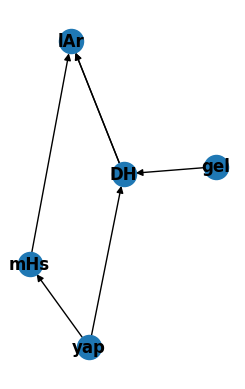

In [6]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
# subax2 = plt.subplot(122)
# nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

In [12]:
G.get_edge_data("gel", "DH")

{0: {'route': '1-3', 'surface': 'di'}}

In [84]:
def has_edge(G, source, target, edge_key):
    edge_data = G.get_edge_data(source, target)
    if edge_data:
        for key, edge in edge_data.items():
            if key == edge_key:
                return edge

def update_graph(G, root, meta_morphemes, morphemes):
    G.add_node(root, root=True)
    last_edge_key = root
    last_node = root

    for i, (meta_morph, morph) in enumerate(zip(meta_morphemes, morphemes)):
        morph_node = f"+{meta_morph}"
        G.add_node(morph_node)
        edge_key = f"{last_edge_key}+{morph}"
        existing_edge = has_edge(G, last_node, morph_node, edge_key)
        is_leaf = i == len(meta_morphemes) - 1
        if existing_edge:
            existing_edge["count"] += 1
            existing_edge["leaf"] += int(is_leaf)
        else:
            G.add_edge(last_node, morph_node, key=edge_key, count=1, leaf=int(is_leaf))
        last_edge_key = edge_key
        last_node = morph_node

In [96]:
from tqdm import tqdm
from utils import read_json
btwd_data = read_json("../experiments/data/tr/btwd/balanced/btwd_prep_post_balanced_sample_morph.json")

G = nx.MultiDiGraph(root=False)

for sample in tqdm(btwd_data["data"], total=len(btwd_data["data"]), desc="Processing samples"):
    update_graph(G, sample["root"], sample["meta_suffixes"], sample["suffixes"])

Processing samples: 100%|██████████| 392/392 [00:00<00:00, 29123.50it/s]


In [ ]:
GH = nx.compose(G, G)

In [85]:
data = [
    {
        "root": "gel",
        "pos": "V",
        "meta_suffixes": ["DH", "lAr"],
        "suffixes": ["di", "ler"]
    },
    {
        "root": "yap",
        "pos": "V",
        "meta_suffixes": ["DH", "lAr"],
        "suffixes": ["tı", "lar"]
    },
    {
        "root": "gel",
        "pos": "V",
        "meta_suffixes": ["DH"],
        "suffixes": ["di"]
    },
    {
        "root": "gel",
        "pos": "V",
        "meta_suffixes": ["DH", "m"],
        "suffixes": ["di", "m"]
    },
        {
        "root": "yap",
        "pos": "V",
        "meta_suffixes": ["mHş", "lAr"],
        "suffixes": ["mış", "lar"]
    },
    {
        "root": "gel",
        "pos": "V",
        "meta_suffixes": ["mHş", "lAr"],
        "suffixes": ["miş", "ler"]
    },
    {
        "root": "yap",
        "pos": "V",
        "meta_suffixes": ["DH", "m"],
        "suffixes": ["tı", "m"]
    },
    {
        "root": "ne",
        "pos": "V",
        "meta_suffixes": ["rA", "DAn"],
        "suffixes": ["re", "den"]
    },
    {
        "root": "ev",
        "pos": "V",
        "meta_suffixes": ["YH", "ne"],
        "suffixes": ["i", "ne"]
    }
]

G = nx.MultiDiGraph(root=False)

for sample in tqdm(data, total=len(data), desc="Processing samples"):
    update_graph(G, sample["root"], sample["meta_suffixes"], sample["suffixes"])

Processing samples: 100%|██████████| 9/9 [00:00<00:00, 15709.00it/s]


In [39]:
G.has_edge("gel", "mHş")

True

In [86]:
G.nodes(data=True)

NodeDataView({'gel': {'root': True}, '+DH': {}, '+lAr': {}, 'yap': {'root': True}, '+m': {}, '+mHş': {}, 'ne': {'root': True}, '+rA': {}, '+DAn': {}, 'ev': {'root': True}, '+YH': {}, '+ne': {}})

In [89]:
G.get_edge_data("gel", "+DH")

{'gel+di': {'count': 3, 'leaf': 1}}

In [88]:
G.edges(data=True)

OutMultiEdgeDataView([('gel', '+DH', {'count': 3, 'leaf': 1}), ('gel', '+mHş', {'count': 1, 'leaf': 0}), ('+DH', '+lAr', {'count': 1, 'leaf': 1}), ('+DH', '+lAr', {'count': 1, 'leaf': 1}), ('+DH', '+m', {'count': 1, 'leaf': 1}), ('+DH', '+m', {'count': 1, 'leaf': 1}), ('yap', '+DH', {'count': 2, 'leaf': 0}), ('yap', '+mHş', {'count': 1, 'leaf': 0}), ('+mHş', '+lAr', {'count': 1, 'leaf': 1}), ('+mHş', '+lAr', {'count': 1, 'leaf': 1}), ('ne', '+rA', {'count': 1, 'leaf': 0}), ('+rA', '+DAn', {'count': 1, 'leaf': 1}), ('ev', '+YH', {'count': 1, 'leaf': 0}), ('+YH', '+ne', {'count': 1, 'leaf': 1})])

In [90]:
nx.write_gml(G, "graph.gml")

In [91]:
H = nx.MultiDiGraph(root=False)

for sample in tqdm(data, total=len(data), desc="Processing samples"):
    update_graph(H, sample["root"], sample["meta_suffixes"], sample["suffixes"])

Processing samples: 100%|██████████| 9/9 [00:00<00:00, 19152.07it/s]


In [97]:
def merge_graphs(G, H):
    GH = nx.compose(G, H)
    count_edge_data = {
        e: G.edges[e]["count"] + H.edges[e]["count"] for e in G.edges & H.edges
    }
    leaf_edge_data = {
        e: G.edges[e]["leaf"] + H.edges[e]["leaf"] for e in G.edges & H.edges
    }
    nx.set_edge_attributes(GH, count_edge_data, "count")
    nx.set_edge_attributes(GH, leaf_edge_data, "leaf")
    return GH

In [98]:
GH = merge_graphs(G, G)

In [ ]:
nx.write_gml(GH, "graph2.gml")

In [93]:
GH.edges(data=True)

OutMultiEdgeDataView([('gel', '+DH', {'count': 3, 'leaf': 1}), ('gel', '+mHş', {'count': 1, 'leaf': 0}), ('+DH', '+lAr', {'count': 1, 'leaf': 1}), ('+DH', '+lAr', {'count': 1, 'leaf': 1}), ('+DH', '+m', {'count': 1, 'leaf': 1}), ('+DH', '+m', {'count': 1, 'leaf': 1}), ('yap', '+DH', {'count': 2, 'leaf': 0}), ('yap', '+mHş', {'count': 1, 'leaf': 0}), ('+mHş', '+lAr', {'count': 1, 'leaf': 1}), ('+mHş', '+lAr', {'count': 1, 'leaf': 1}), ('ne', '+rA', {'count': 1, 'leaf': 0}), ('+rA', '+DAn', {'count': 1, 'leaf': 1}), ('ev', '+YH', {'count': 1, 'leaf': 0}), ('+YH', '+ne', {'count': 1, 'leaf': 1})])

In [94]:
count_edge_data = {
    e: G.edges[e]["count"] + H.edges[e]["count"] for e in G.edges & H.edges
}
leaf_edge_data = {
    e: G.edges[e]["leaf"] + H.edges[e]["leaf"] for e in G.edges & H.edges
}
nx.set_edge_attributes(GH, count_edge_data, "count")
nx.set_edge_attributes(GH, leaf_edge_data, "leaf")

In [95]:
GH.edges(data=True)

OutMultiEdgeDataView([('gel', '+DH', {'count': 6, 'leaf': 2}), ('gel', '+mHş', {'count': 2, 'leaf': 0}), ('+DH', '+lAr', {'count': 2, 'leaf': 2}), ('+DH', '+lAr', {'count': 2, 'leaf': 2}), ('+DH', '+m', {'count': 2, 'leaf': 2}), ('+DH', '+m', {'count': 2, 'leaf': 2}), ('yap', '+DH', {'count': 4, 'leaf': 0}), ('yap', '+mHş', {'count': 2, 'leaf': 0}), ('+mHş', '+lAr', {'count': 2, 'leaf': 2}), ('+mHş', '+lAr', {'count': 2, 'leaf': 2}), ('ne', '+rA', {'count': 2, 'leaf': 0}), ('+rA', '+DAn', {'count': 2, 'leaf': 2}), ('ev', '+YH', {'count': 2, 'leaf': 0}), ('+YH', '+ne', {'count': 2, 'leaf': 2})])

In [55]:
nx.write_gml(G, "graph.gml")

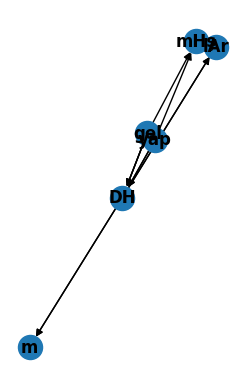

In [32]:
import matplotlib.pyplot as plt

subax1 = plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')

In [8]:
nx.write_gml(G, "graph.gml")

In [51]:
import networkx as nx
G2 = nx.read_gml("/mnt/nlpdata1/home/ismayilz/morph-gen-c4/morph_graphs/318b96dbba16.gml")

In [53]:
G2.edges(data=True)

OutMultiEdgeDataView([('gel', 'DH', {'surface': 'gel+di', 'count': 3, 'leaf': 1}), ('gel', 'mHş', {'surface': 'gel+miş', 'count': 1, 'leaf': 0}), ('DH', 'lAr', {'surface': 'gel+di+ler', 'count': 1, 'leaf': 1}), ('DH', 'lAr', {'surface': 'yap+tı+lar', 'count': 1, 'leaf': 1}), ('DH', 'm', {'surface': 'gel+di+m', 'count': 1, 'leaf': 1}), ('DH', 'm', {'surface': 'yap+tı+m', 'count': 1, 'leaf': 1}), ('yap', 'DH', {'surface': 'yap+tı', 'count': 2, 'leaf': 0}), ('yap', 'mHş', {'surface': 'yap+mış', 'count': 1, 'leaf': 0}), ('mHş', 'lAr', {'surface': 'yap+mış+lar', 'count': 1, 'leaf': 1}), ('mHş', 'lAr', {'surface': 'gel+miş+ler', 'count': 1, 'leaf': 1})])

In [13]:
roots = [node for node, data in G.nodes(data=True) if data.get("root")]

In [15]:
roots[0].neighbors()

AttributeError: 'str' object has no attribute 'neighbors'

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from datasets import load_dataset

# data_dir = "/mnt/nlpdata1/share/datasets/allenai___c4/tr/0.0.0/1588ec454efa1a09f29cd18ddd04fe05fc8653a2"
data_dir = "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/share/datasets/allenai___c4/tr/0.0.0/1588ec454efa1a09f29cd18ddd04fe05fc8653a2"
data_file = "c4-train-00000-of-00545.arrow"
data = load_dataset(data_dir, data_files=data_file, streaming=True)

In [3]:
data

IterableDatasetDict({
    train: IterableDataset({
        features: ['text', 'timestamp', 'url'],
        n_shards: 1
    })
})

In [5]:
cnt = 0

for sample in data["train"]:
    cnt += 1

print(cnt)

159214


In [7]:
data_iter = iter(data["train"])
sample = next(data_iter)

In [6]:
sample

{'text': 'Yeni Kasa Civic Kasko ve Sigorta Ücretlerini Paylaşın Lütfen | Sayfa 24 | CivicTR Forum\nYeni Kasa Civic Kasko ve Sigorta Ücretlerini Paylaşın Lütfen\nKonbuyu başlatan mask946\nBaşlangıç tarihi 16 Eki 2016\nFirst Önceki 24 of 25\nkayafarukk\nŞINGIL\' Alıntı:\n2018 FC5 Eco elegance eşim ilk kez araç aldığı için halk sigorta 936 kasko da aynı firmadan 900 tl fiyat aldım honda mutluhan kendi fiyat teklifinde ise 2300 groupama kasko, sigorta ise 1122 tabi sakın hataya düşüp araç aldığınız yere yaptırmayın\nKasko için aldıgınız fiyat çok iyi bence de , teklifi bir kontrol edin derim teminatları vs\nFc5 dizel 0 premiuma bayiden sigorta yaptırdım.Ak sigorta 1100 kasko Groupama 2100(hasarsızlık indirimi yok).Bu arada sigortam.net e de sordum yeni araç klozu 3 yıl olan tek şirket Groupama imiş.Diğerleri 1 yıl.\nBeğeniler: NoFeaR\nsigorta 720 ak sigorta\nkasko 1330 unico (cam dahil) full kasko. hasarsızlık indirimi var honda servis anlaşmalı\n2018 model Ankara plakalı 1.6 executive eco

In [9]:
str(sample["timestamp"])

'2018-12-17 13:03:42'

In [6]:
import re

text = sample["text"]
words = re.findall(r"\b[^\d\W]+\b", text)
words = [word.lower() for word in words]
words

['yeni',
 'kasa',
 'civic',
 'kasko',
 've',
 'sigorta',
 'ücretlerini',
 'paylaşın',
 'lütfen',
 'sayfa',
 'civictr',
 'forum',
 'yeni',
 'kasa',
 'civic',
 'kasko',
 've',
 'sigorta',
 'ücretlerini',
 'paylaşın',
 'lütfen',
 'konbuyu',
 'başlatan',
 'başlangıç',
 'tarihi',
 'eki',
 'first',
 'önceki',
 'of',
 'kayafarukk',
 'şingil',
 'alıntı',
 'eco',
 'elegance',
 'eşim',
 'ilk',
 'kez',
 'araç',
 'aldığı',
 'için',
 'halk',
 'sigorta',
 'kasko',
 'da',
 'aynı',
 'firmadan',
 'tl',
 'fiyat',
 'aldım',
 'honda',
 'mutluhan',
 'kendi',
 'fiyat',
 'teklifinde',
 'ise',
 'groupama',
 'kasko',
 'sigorta',
 'ise',
 'tabi',
 'sakın',
 'hataya',
 'düşüp',
 'araç',
 'aldığınız',
 'yere',
 'yaptırmayın',
 'kasko',
 'için',
 'aldıgınız',
 'fiyat',
 'çok',
 'iyi',
 'bence',
 'de',
 'teklifi',
 'bir',
 'kontrol',
 'edin',
 'derim',
 'teminatları',
 'vs',
 'dizel',
 'premiuma',
 'bayiden',
 'sigorta',
 'yaptırdım',
 'ak',
 'sigorta',
 'kasko',
 'groupama',
 'hasarsızlık',
 'indirimi',
 'yok',
 '

In [27]:
from collections import Counter
from morphology import decompose_tr, infer_best_decomposition, read_tr_dictionary
from tqdm import tqdm 

counter = Counter(words)
dictionary = read_tr_dictionary()
decompositions = []

for word in tqdm(counter, total=len(counter), desc="Decomposing words"):
    try:
        decomps = [d.to_json() for d in decompose_tr(word)]
        decomp = infer_best_decomposition(word, decomps, dictionary=dictionary)
        if decomp:
            decompositions.append({word: decomp})
    except Exception as e:
        print(e)
        print(word)

Decomposing words: 100%|██████████| 313/313 [00:14<00:00, 21.44it/s]


In [28]:
from utils import write_json

write_json(decompositions, "decomps.json")

In [31]:
decomps = decompose_tr("göstersinler")
[d.to_json() for d in decomps]

[{'root': 'göster',
  'pos': 'VB',
  'meta_morphemes': ['sHnlAr'],
  'morphemes': ['sinler']}]

In [30]:
"onmak" in dictionary

True

In [4]:
from langdetect import detect, detect_langs
s = detect_langs("hello ne yapiyorsun?")
print(type(s[0]))

<class 'langdetect.language.Language'>


In [3]:
from datatrove.pipeline.readers import JsonlReader, IpcReader, CSVReader
# from datatrove.pipeline.filters.c4_filters import C4QualityFilter
from datatrove.executor import LocalPipelineExecutor
from datatrove.data import DocumentsPipeline
from langdetect import detect, detect_langs
from datatrove.data import Document
from datatrove.pipeline.filters.base_filter import BaseFilter
from datatrove.pipeline.writers.disk_base import DiskWriter
from datatrove.pipeline.writers.jsonl import JsonlWriter

def normalize(data: DocumentsPipeline, rank: int = 0, world_size: int = 1) -> DocumentsPipeline:
    for document in data:
        document.timestamp = str(document.timestamp)
        yield document

data_dir = "/mnt/nlpdata1/share/datasets/allenai___c4/tr/0.0.0/1588ec454efa1a09f29cd18ddd04fe05fc8653a2"
dump_data_dir = "/mnt/nlpdata1/home/ismayilz/morph-gen-c4"

class TRLanguageFilter(BaseFilter):
    name = "🌍 Language ID"
    _requires_dependencies = ["langdetect"]

    def __init__(
        self,
        language_threshold: float = 0.9,
        exclusion_writer: DiskWriter = None,
    ):
        """
        filters if the predicted language is not Turkish or if the language score is below language
        language_threshold

        Args:
            language_threshold: language_threshold minimum score to accept a document
            exclusion_writer:
        """
        super().__init__(exclusion_writer)
        self.language_threshold = language_threshold
        self._model = None

    def filter(self, doc: Document) -> bool:
        """Args:
            doc: document

        Returns:
            is_filter
        """

        lang_scores = detect_langs(doc.text)
        tr_score = 0

        for lang_score in lang_scores:
            lang, score = lang_score.split(":")
            if lang == "tr":
                tr_score = float(score)

        doc.metadata["tr_score"] = tr_score
        return tr_score > self.language_threshold
    
preprocessing = LocalPipelineExecutor(
    pipeline=[
        IpcReader(data_dir, stream=True, progress=True, glob_pattern="c4-validation.arrow"),
        normalize,
        TRLanguageFilter(exclusion_writer=f"{dump_data_dir}/lang_filter_removed"),
        JsonlWriter(f"{dump_data_dir}/lang_filtered", "validation_${rank}.jsonl")
    ],
    logging_dir="logs/",
    tasks=1,
    workers=1
)

preprocessing.run()

2024-05-03 13:41:29.360 | INFO     | datatrove.utils.logging:add_task_logger:47 - Launching pipeline for rank=0
2024-05-03 13:41:29.363 | INFO     | datatrove.utils.logging:log_pipeline:76 - 
--- 🛠️ PIPELINE 🛠
📖 - READER: 🪶 Ipc
🔻 - FILTER: 🌍 Language ID
💽 - WRITER: 🐿 Jsonl
2024-05-03 13:41:29.365 | ERROR    | datatrove.executor.base:_run_for_rank:95 - __enter__
Traceback (most recent call last):

  File "/home/ismayilz/.conda/envs/morphgen2/lib/python3.10/runpy.py", line 196, in _run_module_as_main
    return _run_code(code, main_globals, None,
           │         │     └ {'__name__': '__main__', '__doc__': 'Entry point for launching an IPython kernel.\n\nThis is separate from the ipykernel pack...
           │         └ <code object <module> at 0x7f2849cb2c30, file "/home/ismayilz/.conda/envs/morphgen2/lib/python3.10/site-packages/ipykernel_la...
           └ <function _run_code at 0x7f2849caf5b0>
  File "/home/ismayilz/.conda/envs/morphgen2/lib/python3.10/runpy.py", line 86, in _run

AttributeError: __enter__

In [4]:
import sys

sys.set

'iso8859-1'

In [1]:
from datasets import load_dataset

data_dir = "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/share/datasets/wikimedia___wikipedia/20231101.tr/0.0.0/b04c8d1ceb2f5cd4588862100d08de323dccfbaa"
data_file = "wikipedia-train-00000-of-00002.arrow"
data = load_dataset(data_dir, streaming=True)

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/.miniconda3/envs/morph-gen/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data["train"]

IterableDataset({
    features: ['id', 'url', 'title', 'text'],
    n_shards: 2
})

In [13]:
import pathlib, json
from tqdm import tqdm

output_dir = "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/morph-gen-wiki/batch_jsonl"
batch = []
batch_size = 1000
batch_id = 0

pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)

def write_batch(batch, batch_id):
    if batch:
        with open(f"{output_dir}/{str(batch_id).zfill(5)}.jsonl", mode="wt", encoding="utf-8") as f:
            for doc in batch:
                try:
                    f.write(json.dumps(doc, ensure_ascii=False) + "\n")
                except Exception as e:
                    print(doc)
                    raise e
    
for document in tqdm(iter(data["train"]), total=535000):
    if len(batch) < batch_size:
        batch.append(document)
    else:
        write_batch(batch, batch_id)
        batch = []
        batch_id += 1

write_batch(batch, batch_id)

100%|█████████▉| 534988/535000 [01:37<00:00, 5488.85it/s]


In [12]:
data_iter = iter(data["train"])

sample = next(data_iter)

with open("test.jsonl", mode="wt", encoding="utf-8") as f:
    f.write(json.dumps(sample, ensure_ascii=False)+"\n")

In [1]:
%load_ext autoreload
%autoreload

In [5]:
from morphology import decompose_tr, infer_best_decompositions_tr, read_tr_dictionary

decomps = [decomp.to_json() for decomp in decompose_tr("olmayabilirsiniz")]

for decomp in decomps:
    print(decomp)

infer_best_decompositions_tr(None, decomps, read_tr_dictionary())

{'root': 'ol', 'pos': 'NN', 'meta_morphemes': ['mA', 'YAbil', 'Hr', 'sH', 'HnHz'], 'morphemes': ['ma', 'yabil', 'ir', 'si', 'niz']}
{'root': 'ol', 'pos': 'NN', 'meta_morphemes': ['mA', 'YAbil', 'Hr', 'sH', 'HnHz'], 'morphemes': ['ma', 'yabil', 'ir', 'si', 'niz']}
{'root': 'ol', 'pos': 'NOMP', 'meta_morphemes': ['mA', 'YAbil', 'Hr', 'sHnHz'], 'morphemes': ['ma', 'yabil', 'ir', 'siniz']}
{'root': 'ol', 'pos': 'NOMP', 'meta_morphemes': ['mA', 'YAbil', 'Hr', 'sH', 'Hn', 'YHz'], 'morphemes': ['ma', 'yabil', 'ir', 'si', 'n', 'iz']}
{'root': 'ol', 'pos': 'NOMP', 'meta_morphemes': ['mA', 'YAbil', 'Hr', 'sH', 'Hn', 'YHz'], 'morphemes': ['ma', 'yabil', 'ir', 'si', 'n', 'iz']}


[{'root': 'ol',
  'pos': 'NOMP',
  'meta_morphemes': ['mA', 'YAbil', 'Hr', 'sHnHz'],
  'morphemes': ['ma', 'yabil', 'ir', 'siniz']}]

In [14]:
from datasets import load_dataset

data_dir = "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/batch_jsonl"

train_files = [f"{data_dir}/{str(i).zfill(5)}.jsonl" for i in range(530)]
validation_files = [f"{data_dir}/{str(i).zfill(5)}.jsonl" for i in range(530, 535)]

# train_data = load_dataset("json", data_dir=data_dir, data_files=train_files, streaming=True)
# validation_data = load_dataset("json", data_dir=data_dir, data_files=validation_files, streaming=True)

In [23]:
from datasets import DatasetDict, Value, Features

features = Features({
    "id": Value(dtype="int64"),
    "url": Value(dtype="string"),
    "title": Value(dtype="string"),
    "text": Value(dtype="string")
})
full_data = DatasetDict.from_json({"train": train_files, "validation": validation_files}, features=features)

Generating train split: 530000 examples [00:05, 91139.84 examples/s] 
Generating validation split: 4454 examples [00:00, 80942.77 examples/s]


In [24]:
full_data

DatasetDict({
    train: Dataset({
        features: ['id', 'url', 'title', 'text'],
        num_rows: 530000
    })
    validation: Dataset({
        features: ['id', 'url', 'title', 'text'],
        num_rows: 4454
    })
})

In [25]:
full_data.save_to_disk(f"/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/data")

Saving the dataset (0/2 shards):   0%|          | 0/530000 [00:00<?, ? examples/s]

Saving the dataset (1/1 shards): 100%|██████████| 4454/4454 [00:00<00:00, 42105.45 examples/s]


In [33]:
full_data.push_to_hub("mismayil/tr_wikipedia")

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.14it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/mismayil/tr_wikipedia/commit/ba079d3e635654ed9e8e3c48006de369b25ca1d5', commit_message='Upload dataset', commit_description='', oid='ba079d3e635654ed9e8e3c48006de369b25ca1d5', pr_url=None, pr_revision=None, pr_num=None)

In [36]:
def lowertext(ex):
    ex["text"] = ex["text"].lower()
    return ex

full_data = full_data.map(lowertext)

Map: 100%|██████████| 4454/4454 [00:00<00:00, 9396.19 examples/s]


In [37]:
full_data["train"][0]

{'id': 10,
 'url': 'https://tr.wikipedia.org/wiki/Cengiz%20Han',
 'title': 'Cengiz Han',
 'text': 'cengiz han (doğum adıyla temuçin,  – 18 ağustos 1227), moğol i̇mparatorluğu\'nun kurucusu ve ilk kağanı olan moğol komutan ve hükümdardır. hükümdarlığı döneminde gerçekleştirdiği hiçbir savaşı kaybetmeyen cengiz han, dünya tarihinin en büyük askeri liderlerinden birisi olarak kabul edilmektedir. 13. yüzyılın başında orta asya\'daki tüm göçebe bozkır kavimlerini birleştirip bir ulus hâline getirerek moğol siyasi kimliği çatısı altında toplamıştır. cengiz han, hükümdarlığı döneminde, 1206-1227 arasında, kuzey çin\'deki batı xia ve jin hanedanı; türkistan\'daki kara hıtay, maveraünnehir; harezm, horasan ve i̇ran\'daki harezmşahlar, kafkasya\'daki gürcüler, deşt-i kıpçak\'taki rus knezlikleri, kıpçaklar ile i̇dil bulgarları üzerine seferler yaptı ve imparatorluğu döneminde gerçekleştirdiği hiçbir savaşı kaybetmedi. bunların sonucunda pasifik okyanusu\'ndan hazar denizi\'ne ve karadeniz\'in ku

In [38]:
full_data.push_to_hub("mismayil/tr_wikipedia", commit_message="Lowercase all data")

Uploading the dataset shards: 100%|██████████| 1/1 [00:00<00:00,  1.01it/s]


CommitInfo(commit_url='https://huggingface.co/datasets/mismayil/tr_wikipedia/commit/30751b03c1d9935587d22e020cf93c67a55890d5', commit_message='Lowercase all data', commit_description='', oid='30751b03c1d9935587d22e020cf93c67a55890d5', pr_url=None, pr_revision=None, pr_num=None)

In [1]:
from datasets import load_dataset

data = load_dataset("mismayil/tr_wikipedia")

/anaconda/envs/morphgen/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating validation split: 100%|██████████| 4454/4454 [00:00<00:00, 158755.80 examples/s]


In [2]:
len(data["train"]["text"])

530000

In [30]:
data

IterableDatasetDict({
    train: IterableDataset({
        features: ['id', 'url', 'title', 'text'],
        n_shards: 3
    })
    validation: IterableDataset({
        features: ['id', 'url', 'title', 'text'],
        n_shards: 2
    })
})

In [3]:
sample = next(iter(data["train"]))

In [9]:
from transformers import GPT2Tokenizer, GPT2LMHeadModel
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# model_dir = "/home/azureuser/morph-gen-artifacts/tr_gpt2_pretrained6/"
model_dir = "mismayil/tr_gpt2_tokenizer"
tokenizer = GPT2Tokenizer.from_pretrained(model_dir)
# model = GPT2LMHeadModel.from_pretrained(model_dir).to(device)

/anaconda/envs/morphgen/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


In [10]:
encoded_input = tokenizer(sample["text"], return_tensors='pt')

Token indices sequence length is longer than the specified maximum sequence length for this model (20670 > 1024). Running this sequence through the model will result in indexing errors


In [11]:
encoded_input

{'input_ids': tensor([[35069,  1258,   316,  ...,  2123,  1423, 20853]]), 'attention_mask': tensor([[1, 1, 1,  ..., 1, 1, 1]])}

In [12]:
tokens = [tokenizer.convert_ids_to_tokens(enc) for enc in encoded_input["input_ids"]]

In [13]:
tokens

[['cengiz',
  'Ġhan',
  'Ġ(',
  'doÄŁum',
  'ĠadÄ±yla',
  'Ġtem',
  'uÃ§in',
  ',',
  'Ġ',
  'ĠâĢĵ',
  'Ġ18',
  'ĠaÄŁustos',
  'Ġ122',
  '7',
  '),',
  'ĠmoÄŁol',
  'Ġi',
  'Ìĩ',
  'mparatorluÄŁu',
  "'",
  'nun',
  'Ġkurucusu',
  'Ġve',
  'Ġilk',
  'ĠkaÄŁ',
  'anÄ±',
  'Ġolan',
  'ĠmoÄŁol',
  'Ġkomutan',
  'Ġve',
  'ĠhÃ¼kÃ¼mdar',
  'dÄ±r',
  '.',
  'ĠhÃ¼kÃ¼mdarlÄ±ÄŁÄ±',
  'ĠdÃ¶neminde',
  'ĠgerÃ§ekleÅŁtirdiÄŁi',
  'ĠhiÃ§bir',
  'ĠsavaÅŁÄ±',
  'Ġkaybet',
  'meyen',
  'Ġcengiz',
  'Ġhan',
  ',',
  'ĠdÃ¼nya',
  'Ġtarihinin',
  'Ġen',
  'ĠbÃ¼yÃ¼k',
  'Ġaskeri',
  'Ġliderlerinden',
  'Ġbirisi',
  'Ġolarak',
  'Ġkabul',
  'Ġedilmektedir',
  '.',
  'Ġ13',
  '.',
  'ĠyÃ¼zyÄ±lÄ±n',
  'ĠbaÅŁÄ±nda',
  'Ġorta',
  'Ġasya',
  "'d",
  'aki',
  'ĠtÃ¼m',
  'ĠgÃ¶Ã§ebe',
  'ĠbozkÄ±r',
  'Ġkavim',
  'lerini',
  'ĠbirleÅŁtir',
  'ip',
  'Ġbir',
  'Ġulus',
  'ĠhÃ¢line',
  'Ġgetirerek',
  'ĠmoÄŁol',
  'Ġsiyasi',
  'ĠkimliÄŁi',
  'ĠÃ§atÄ±sÄ±',
  'ĠaltÄ±nda',
  'ĠtoplamÄ±ÅŁtÄ±r',
  '.',
  'Ġcengiz',
  'Ġhan',

In [2]:
text = "Bir yaz akşamı"
encoded_input = tokenizer(text, return_tensors='pt')
output = model.generate(inputs=encoded_input["input_ids"].to(device), max_new_tokens=64)
generation = tokenizer.decode(output.squeeze())

generation

The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:0 for open-end generation.


"Bir yaz akşamı, i̇stanbul'da bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir gece kulübünde bir"

In [10]:
output

tensor([[50091,   331,  1031, 47594, 46481,   321, 30102, 45658,   479,   724,
           272, 30102,    75,    76,   461,    83,   324, 30102,    81,    13]],
       device='cuda:0')

In [2]:
output

BaseModelOutputWithPastAndCrossAttentions(last_hidden_state=tensor([[[ 0.7456,  0.7266, -1.3569,  ..., -1.3657,  0.3091, -0.0666],
         [ 0.1190,  0.1876,  0.6381,  ..., -0.5461, -0.8155, -0.4275],
         [-0.3089, -0.0738, -0.6753,  ...,  0.9962, -0.0924, -1.2696],
         ...,
         [ 0.1193,  1.3388,  0.7902,  ...,  0.9078, -0.9098,  0.5864],
         [-0.1722,  0.2067, -1.7661,  ...,  1.0117,  0.2560, -1.0787],
         [ 1.0271, -0.8400, -0.8861,  ...,  1.2706,  1.3872, -0.4512]]],
       grad_fn=<ViewBackward0>), past_key_values=((tensor([[[[ 0.0971,  0.3592,  0.0951,  ...,  1.3680, -0.5331,  0.1647],
          [-0.2291,  0.6478, -1.4609,  ...,  0.4102, -0.7204, -0.7154],
          [-0.5788, -1.1773,  0.9028,  ...,  0.3422, -0.5970, -0.3063],
          ...,
          [-0.6668,  0.1417,  0.6667,  ..., -0.3047,  0.4189, -0.7274],
          [ 0.4668,  0.7157, -0.5993,  ..., -0.3851,  0.1236, -0.6100],
          [-0.2276, -0.0567, -0.1276,  ..., -0.1874,  0.0856, -0.4666]],

In [1]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/tokenizers/gpt2")
tokenizer.push_to_hub("mismayil/tr_gpt2_tokenizer")

CommitInfo(commit_url='https://huggingface.co/mismayil/tr_gpt2_tokenizer/commit/3800eda34b7b425911c0683377fe6a0638948ec9', commit_message='Upload tokenizer', commit_description='', oid='3800eda34b7b425911c0683377fe6a0638948ec9', pr_url=None, pr_revision=None, pr_num=None)

In [2]:
from utils import read_json, write_json

data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json")

batch1 = []
batch2 = []

for i in range(1, 8):
    idata = [sample for sample in data["data"] if len(sample["suffixes"]) == i]
    batch1.extend(idata[:len(idata)//2])
    batch2.extend(idata[len(idata)//2:])

write_json(batch1, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch1.json")
write_json(batch2, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch2.json")

In [1]:
with open("/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/batch_jsonl/00197.jsonl", encoding="utf-8") as f:
    i = 0
    for line in f:
        if i == 259 or i == 260:
            print(line)
        
        if i > 260:
            break
        
        i += 1

{"id": "1590378", "url": "https://tr.wikipedia.org/wiki/Masatenisi%20Gen%C3%A7lik%20ve%20Spor%20Bakanl%C4%B1%C4%9F%C4%B1%20Kupas%C4%B1", "title": "Masatenisi Gençlik ve Spor Bakanlığı Kupası", "text": "Masatenisi Gençlik ve Spor Bakanlığı Kupası Türkiye'de masatenisi sporunda 1969-1982 arasında düzenlenen kulüplerarası resmi organizasyon.\n\nTürkiye Masatenisi Federasyonu, 1968-69 sezonundan itibaren Türkiye Şampiyonası'na ilaveten futbol ve basketbolda uygulanan Türkiye Kupası'na benzer şekilde Federasyon Kupası adlı bir organizasyon başlatmış, buna paralel olarak ayrıca Türkiye Şampiyonası ile Federasyon Kupası'nda dereceye giren takımların karşı karşıya geldikleri Beden Terbiyesi Genel Müdürlüğü Kupasını da uygulamaya koymuştur. 1969 Türkiye genel seçimlerinin ardından Spor Bakanlığı'nın kurulmasının ardından Kupanın adı Gençlik ve Spor Bakanlığı Kupası olarak değiştirilmiştir.\n\nKupa, Türkiye'nin çeşitli illerin evsahipliğinde 1981-82 sezonuna kadar düzenli olarak yapılmıştır. 198

In [3]:
from utils import read_json
from morphology import update_morph_graph, create_morph_graph

data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final.json")

G = create_morph_graph()

for sample in data["data"]:
    update_morph_graph(G, sample["root"], sample["meta_morphemes"], sample["morphemes"], update_stats=False)

In [4]:
from morphology import write_morph_graph

write_morph_graph(G, "../data/tr/bilkent-turkish-writings/btwd_default_final.gml")

In [35]:
from collections import Counter
from itertools import chain

frequency = {
    "roots": Counter(set([sample["root"] for sample in data["data"]])),
    "meta_morphemes": Counter(set(list(chain(*[sample["meta_morphemes"] for sample in data["data"]])))),
    "morphemes": Counter(set(list(chain(*[sample["morphemes"] for sample in data["data"]]))))
}

In [14]:
frequency

{'roots': Counter({'tercih': 1,
          'odak': 1,
          'ağır': 1,
          'besle': 1,
          'ol': 1,
          'bilinç': 1,
          'kork': 1,
          'isim': 1,
          'çiz': 1,
          'taraf': 1,
          'etiket': 1,
          'bakım': 1,
          'fikir': 1,
          'yarat': 1,
          'betim': 1,
          'son': 1,
          'güç': 1,
          'çık': 1,
          'konuş': 1,
          'hırpala': 1,
          'çare': 1,
          'eleştir': 1,
          'küçümse': 1,
          'ilişki': 1,
          'kayna': 1,
          'liman': 1,
          'tanrı': 1,
          'engel': 1,
          'var': 1,
          'sapla': 1,
          'kapa': 1,
          'din': 1,
          'ızdırap': 1,
          'nesil': 1,
          'kimse': 1,
          'ört': 1,
          'kırp': 1,
          'sayfa': 1,
          'yüce': 1,
          'örtü': 1,
          'kalabalık': 1,
          'simge': 1,
          'temel': 1,
          'acıma': 1,
          'şair': 1,
          'k

In [64]:
from morphology import read_morph_graph
train_graph = read_morph_graph("sample_train_graph.gml")
btwd_graph = read_morph_graph("../data/tr/bilkent-turkish-writings/btwd_default_final.gml")
# train_graph = read_morph_graph("/mnt/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/morph_graphs/00000/4cc3d9cba4633096fadf09ea1106b4b321ab81b1d461c3d6994f0e303f631249.gml")

In [68]:
import networkx as nx

intersection = nx.intersection(btwd_graph, train_graph)

In [72]:
intersection.edges

OutMultiEdgeView([('+Hn', '+NDA', 'saat+ler+in+de'), ('+lAr', '+Hn', 'saat+ler+in'), ('ol', '+YArAk', 'ol+arak'), ('olay', '+lAr', 'olay+lar'), ('yüz', '+lArcA', 'yüz+lerce'), ('saat', '+lAr', 'saat+ler'), ('başka', '+Hn', 'başka+n')])

In [75]:
edge = next(iter(intersection.edges))

In [77]:
edge

('+Hn', '+NDA', 'saat+ler+in+de')

In [80]:
btwd_graph.get_edge_data(*edge)

{'count': 0, 'leaf': 0}

In [10]:
subgraph = nx.induced_subgraph(train_graph, ["+Hn", "+NDA", "+lAr"])

In [28]:
train_graph.edges['+Hn', '+NDA', None]

KeyError: None

In [67]:
train_graph.in_edges('+lAr', keys=True)

InMultiEdgeDataView([('olay', '+lAr', 'olay+lar'), ('+Hm', '+lAr', 'doğu+m+lar'), ('+Hm', '+lAr', 'ölü+m+ler'), ('ölüm', '+lAr', 'ölüm+ler'), ('saat', '+lAr', 'saat+ler'), ('bin', '+lAr', 'bin+ler'), ('yüz', '+lAr', 'yüz+ler'), ('kardeş', '+lAr', 'kardeş+ler'), ('doğum', '+lAr', 'doğum+lar')])

In [30]:
x = train_graph.adj['+Hn']['+NDA']
for key, edge in x.items():
    print(key, edge)

saat+ler+in+de {'count': 1, 'leaf': 1}


In [26]:
list(train_graph.neighbors("+Hn"))

['+YA', '+NDA', '+NH']

In [14]:
nx.is_path(train_graph, ['+lAr', '+Hn', '+NDAn'])

False

In [17]:
subgraph.edges(['+lAr', '+Hn'], data=True)

OutMultiEdgeDataView([('+lAr', '+Hn', {'count': 1, 'leaf': 0}), ('+Hn', '+NDA', {'count': 1, 'leaf': 1})])

In [60]:
from utils import find_files, write_json, read_json
from morphology import read_morph_graph, create_morph_graph, update_morph_graph, write_morph_graph
from collections import Counter
import networkx as nx
from itertools import chain
from tqdm import tqdm

def process_wiki_for_btwd(btwd_path):
    # btwd_path = pathlib.Path(btwd_path)
    # btwd_data = read_json(btwd_path)
    btwd_data = {
        "data": [
            {
                "root": "saat",
                "morphemes": [
                    "ler",
                    "in",
                    "de"
                ],
                "meta_morphemes": [
                    "lAr",
                    "Hn",
                    "NDA"
                ]
            },
            {
                "root": "saat",
                "morphemes": [
                    "in",
                    "de"
                ],
                "meta_morphemes": [
                    "Hn",
                    "NDA"
                ]
            },
            {
                "root": "kavga",
                "morphemes": [
                    "lar",
                    "ın",
                    "da"
                ],
                "meta_morphemes": [
                    "lAr",
                    "Hn",
                    "NDA"
                ]
            },
            {
                "root": "olay",
                "morphemes": [
                    "lar"
                ],
                "meta_morphemes": [
                    "lAr"
                ]
            },
            {
                "root": "kisi",
                "morphemes": [
                    "lik",
                    "ler"
                ],
                "meta_morphemes": [
                    "lHk",
                    "lAr"
                ]
            }
        ]
    }
    btwd_graph = create_morph_graph()

    for sample in btwd_data["data"]:
        update_morph_graph(btwd_graph, sample["root"], sample["meta_morphemes"], sample["morphemes"], update_stats=False)
    
    # write_morph_graph(btwd_graph, btwd_path.with_suffix(".gml"))

    btwd_frequency = {
        "roots": Counter(set([sample["root"] for sample in btwd_data["data"]])),
        "meta_morphemes": Counter(set(list(chain(*[sample["meta_morphemes"] for sample in btwd_data["data"]])))),
        "morphemes": Counter(set(list(chain(*[sample["morphemes"] for sample in btwd_data["data"]])))),
        "meta_morpheme_compositions": Counter(),
        "morpheme_compositions": Counter()
    }

    train_files = ["../4cc3d9cba4633096fadf09ea1106b4b321ab81b1d461c3d6994f0e303f631249.gml"]
    # train_files = [file for file in train_files if not any([str(i).zfill(5) in file for i in range(530, 535)])]

    with open("train_files.txt", "w") as f:
        f.writelines([file+"\n" for file in train_files])

    for i, train_file in enumerate(train_files):
        train_graph = read_morph_graph(train_file)
        intersection = nx.intersection(btwd_graph, train_graph)

        for node in intersection.nodes:
            if node.startswith("+"):
                btwd_frequency["meta_morphemes"].update([node[1:]])
            else:
                btwd_frequency["roots"].update([node])

        for sample in btwd_data["data"]:
            meta_morpheme_composition = ""
            morpheme_composition = ""
            last_meta_morpheme_node = None

            for j, (meta_morpheme, morpheme) in enumerate(zip(sample["meta_morphemes"], sample["morphemes"])):
                meta_morpheme_node = f"+{meta_morpheme}"
                morpheme_node = f"+{morpheme}"

                if j == 0:
                    last_meta_morpheme_node = meta_morpheme_node
                    meta_morpheme_composition += meta_morpheme_node
                    morpheme_composition += morpheme_node
                    continue
                
                neighbors = list(train_graph.neighbors(last_meta_morpheme_node))

                if meta_morpheme_node in neighbors:
                    meta_morpheme_composition += meta_morpheme_node
                    morpheme_composition += morpheme_node
                    btwd_frequency["meta_morpheme_compositions"].update([meta_morpheme_composition])
                    edges = train_graph.adj[last_meta_morpheme_node][meta_morpheme_node]
                    
                    morpheme_composition_found = False
                    
                    for edge_key, _ in edges.items():
                        if morpheme_composition in edge_key:
                            btwd_frequency["morpheme_compositions"].update([morpheme_composition])
                            morpheme_composition_found = True
                            break
                            
                    if not morpheme_composition_found:
                        break
                else:
                    break

                last_meta_morpheme_node = meta_morpheme_node

    write_json(btwd_frequency, f"freq.json")

In [61]:
process_wiki_for_btwd(None)

In [17]:
for node in intersection.nodes:
    if node.startswith("+"):
        frequency["meta_morphemes"].update([node])
    else:
        frequency["roots"].update([node])

In [29]:
for edge in intersection.edges:
    derivation = edge[2]
    morphemes = derivation.split("+")
    num_meta_morphemes = sum([1 for i in range(2) if edge[i].startswith("+")])
    morphemes = morphemes[-num_meta_morphemes:]
    frequency["morphemes"].update(morphemes)
    nx.set_edge_attributes(G, {edge: {"count": 1}})
    print(edge)
    print(morphemes)

('ol', '+YArAk', 'ol+arak')
['arak']
('yüz', '+lArcA', 'yüz+lerce')
['lerce']
('+lAr', '+Hn', 'saat+ler+in')
['ler', 'in']
('olay', '+lAr', 'olay+lar')
['lar']
('başka', '+Hn', 'başka+n')
['n']
('saat', '+lAr', 'saat+ler')
['ler']
('+Hn', '+NDA', 'saat+ler+in+de')
['in', 'de']


In [30]:
for edge in intersection.edges:
    print(G.get_edge_data(*edge))

{'count': 1, 'leaf': 0}
{'count': 1, 'leaf': 0}
{'count': 1, 'leaf': 0}
{'count': 1, 'leaf': 0}
{'count': 1, 'leaf': 0}
{'count': 1, 'leaf': 0}
{'count': 1, 'leaf': 0}


In [33]:
import glob

files = glob.glob("/mnt/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/morph_graphs/**/*.gml", recursive=True)
len(files)

534454

In [36]:
from utils import write_json

write_json(frequency, "test.json")

In [25]:
frequency

{'roots': Counter({'tercih': 1,
          'odak': 1,
          'ağır': 1,
          'besle': 1,
          'ol': 1,
          'bilinç': 1,
          'kork': 1,
          'isim': 1,
          'çiz': 1,
          'taraf': 1,
          'etiket': 1,
          'bakım': 1,
          'fikir': 1,
          'yarat': 1,
          'betim': 1,
          'son': 1,
          'güç': 1,
          'çık': 1,
          'konuş': 1,
          'hırpala': 1,
          'çare': 1,
          'eleştir': 1,
          'küçümse': 1,
          'ilişki': 1,
          'kayna': 1,
          'liman': 1,
          'tanrı': 1,
          'engel': 1,
          'var': 1,
          'sapla': 1,
          'kapa': 1,
          'din': 1,
          'ızdırap': 1,
          'nesil': 1,
          'kimse': 1,
          'ört': 1,
          'kırp': 1,
          'sayfa': 1,
          'yüce': 1,
          'örtü': 1,
          'kalabalık': 1,
          'simge': 1,
          'temel': 1,
          'acıma': 1,
          'şair': 1,
          'k

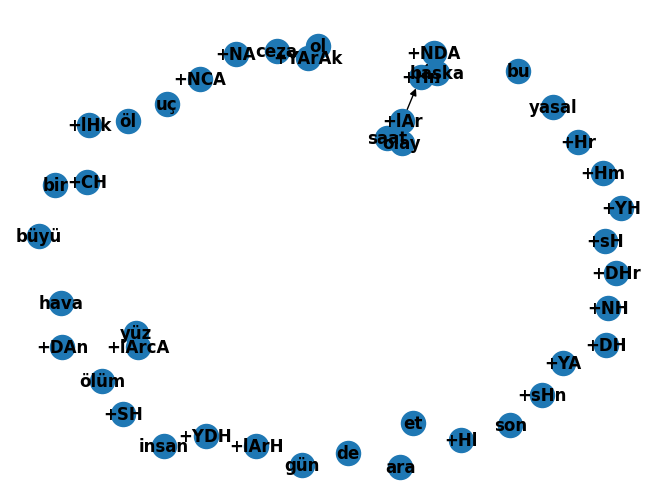

In [7]:
nx.draw(intersection, with_labels=True, font_weight='bold')

In [9]:
from utils import read_json, write_json
from morphology import read_morph_graph

btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw.json")
btwd_freq = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw_freq.json")
btwd_graph = read_morph_graph("../data/tr/bilkent-turkish-writings/btwd_default_final_raw.gml")

In [26]:
from tqdm import tqdm

for sample in tqdm(btwd_data["data"], total=len(btwd_data["data"]), desc="Processing samples"):
    for decomposition in sample["decompositions"]:
        if not decomposition["morphemes"]:
            continue

        root_seen = btwd_freq["roots"].get(decomposition["root"], 0) > 1
        meta_morphemes_seen = all([btwd_freq["meta_morphemes"].get(meta_morpheme, 0) > 1 for meta_morpheme in decomposition["meta_morphemes"]])
        morphemes_seen = all([btwd_freq["morphemes"].get(morpheme, 0) > 1 for morpheme in decomposition["morphemes"]])
        seen_morpheme_comps = []
        num_meta_morpheme_comps_seen = 0
        num_morpheme_comps_seen = 0

        for i, v in enumerate(decomposition["meta_morphemes"]):
            u = decomposition["root"] if i == 0 else "+" + decomposition["meta_morphemes"][i-1]
            v = "+" + v
            edge_key = decomposition["root"] + "+" + "+".join(decomposition["morphemes"][:i+1])
            edge_data = btwd_graph.get_edge_data(u, v, edge_key)
            if edge_data.get("count", 0) > 0:
                num_meta_morpheme_comps_seen += 1
                num_morpheme_comps_seen += 1
                seen_morpheme_comps.append(edge_key)
            else:
                break

        for k in range(len(decomposition["morphemes"])):
            for j in range(k+1, len(decomposition["morphemes"])):
                meta_morpheme_comp = "+" + "+".join(decomposition["meta_morphemes"][k:j+1])
                morpheme_comp = "+" + "+".join(decomposition["morphemes"][k:j+1])
                meta_morpheme_comp_freq = min(1, btwd_freq["meta_morpheme_compositions"].get(meta_morpheme_comp, 0))
                morpheme_comp_freq = min(1, btwd_freq["morpheme_compositions"].get(morpheme_comp, 0))
                num_meta_morpheme_comps_seen += meta_morpheme_comp_freq
                num_morpheme_comps_seen += morpheme_comp_freq
                if morpheme_comp_freq > 0:
                    seen_morpheme_comps.append(morpheme_comp)
        
        decomposition["id_root"] = root_seen
        decomposition["id_meta_morphemes"] = meta_morphemes_seen
        decomposition["id_morphemes"] = morphemes_seen
        num_compositions = len(decomposition["meta_morphemes"]) * (len(decomposition["meta_morphemes"]) + 1) // 2
        decomposition["meta_morpheme_id_pct"] = num_meta_morpheme_comps_seen * 100 / num_compositions
        decomposition["morpheme_id_pct"] = num_morpheme_comps_seen * 100 / num_compositions
        decomposition["seen_morpheme_comps"] = seen_morpheme_comps


metadata = {
    "source": "../data/tr/bilkent-turkish-writings/btwd_default_final_raw.json",
    "processor": "",
    "language": "tr"
}

write_json({"metadata": metadata, "data": btwd_data["data"]}, "../data/tr/bilkent-turkish-writings/btwd_default_final_raw_id_ood.json")

Processing samples: 100%|██████████| 1767/1767 [00:00<00:00, 8043.59it/s] 


In [8]:
len(id_data), len(ood_data), len(other_data)

(825, 878, 64)

In [9]:
id_map = {i: len([sample for sample in id_data if len(sample["morphemes"]) == i]) for i in range(1, 8)}
ood_map = {i: len([sample for sample in ood_data if len(sample["morphemes"]) == i]) for i in range(1, 8)}
other_map = {i: len([sample for sample in other_data if len(sample["morphemes"]) == i]) for i in range(1, 8)}

id_map, ood_map, other_map

({1: 229, 2: 179, 3: 156, 4: 113, 5: 78, 6: 48, 7: 22},
 {1: 26, 2: 72, 3: 102, 4: 157, 5: 183, 6: 208, 7: 130},
 {1: 4, 2: 19, 3: 10, 4: 12, 5: 11, 6: 5, 7: 3})

In [15]:
ood_data_map = {sample["id"]: sample for sample in ood_data}
outputs = read_json("../experiments/outputs/gpt-2/tr/btwd/temp_en/v_default_pp/btwd_default_final_ood_morph_eval_morph_disc_pp_en_s0_gpt-2_d978d03299ab.json")

for sample in outputs["data"]:
    ood_sample = ood_data_map[sample["id"]]
    sample["ood_pct"] = ood_sample["ood_pct"]

In [16]:
write_json(outputs, "../experiments/outputs/gpt-2/tr/btwd/temp_en/v_default_pp/btwd_default_final_ood_morph_eval_morph_disc_pp_en_s0_gpt-2_d978d03299ab.json")

In [18]:
from utils import read_json, write_json
from itertools import chain
import random

batch1_data = read_json("../experiments/data/tr/btwd/final/default/review/btwd_default_final_morph_batch1_reviewed.json")
batch2_data = read_json("../experiments/data/tr/btwd/final/default/review/btwd_default_final_morph_batch2_reviewed.json")
final_data = {i: [] for i in range(1, 8)}

for sample in batch1_data+batch2_data:
    if "___" not in sample["sentence"]:
        sample["sentence"] = sample["sentence"].replace(sample["derivation"], "___")
    assert sample["sentence"].count("___") == 1, sample
    final_data[len(sample["suffixes"])].append(sample)

final_data_lst = list(chain(*final_data.values()))
metadata = {
        "sources": ["../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch1.json", "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch2.json"],
        "processor": "morph",
        "language": "tr",
        "size": len(final_data_lst),
        "size_by_suffix_len": {i: len(final_data[i]) for i in range(1, 8)}
}

write_json({"metadata": metadata, "data": final_data_lst}, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json")

sample_data = []

for i in range(1, 8):
    i_data = [sample for sample in final_data_lst if len(sample["suffixes"]) == i]
    sample_data.extend(random.sample(i_data, 50))

metadata = {
        "sources": ["../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json"],
        "processor": "morph",
        "language": "tr",
        "size": len(sample_data),
        "size_by_suffix_len": {i: len([sample for sample in sample_data if len(sample["suffixes"]) == i]) for i in range(1, 8)}
}

write_json({"metadata": metadata, "data": sample_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_sample.json")

In [23]:
final_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json")
id_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_id_morph.json")
ood_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_ood_morph.json")

new_id_data = []
new_ood_data = []
final_data_map = {sample["id"]: sample for sample in final_data["data"]}

for sample in id_data["data"]:
    final_sample = final_data_map.get(sample["id"])
    if not final_sample:
        print(f"didnt find sample {sample}")
    else:
        new_id_data.append(final_sample)

for sample in ood_data["data"]:
    final_sample = final_data_map.get(sample["id"])
    if not final_sample:
        print(f"didnt find sample {sample}")
    else:
        new_ood_data.append(final_sample)

metadata = {
    "source": "../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json",
    "processor": "morph",
    "language": "tr",
    "size": len(new_id_data),
    "size_by_suffix_len": {i: len([sample for sample in new_id_data if len(sample["suffixes"]) == i]) for i in range(1, 8)}
}

write_json({"metadata": metadata, "data": new_id_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_id_morph.json")

metadata = {
    "source": "../experiments/data/tr/btwd/final/default/btwd_default_final_morph.json",
    "processor": "morph",
    "language": "tr",
    "size": len(new_ood_data),
    "size_by_suffix_len": {i: len([sample for sample in new_ood_data if len(sample["suffixes"]) == i]) for i in range(1, 8)}
}

write_json({"metadata": metadata, "data": new_ood_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_ood_morph.json")

didnt find sample {'id': 'tr-btwd-adb117b8', 'id_root': 'kadar', 'ood_root': None, 'root': 'kadar', 'pos': 'N', 'suffixes': ['da'], 'derivation': 'kadarda', 'positive_options': ['kadarda'], 'negative_options': [], 'answer': 0, 'meta_suffixes': ['DA'], 'sentence': 'ama vagonun içinde yankılanan müzik bir an bütün bu evhamları bir kenara bırakıp aslında birbirimizden o ___ farklı olmadığımızı yeniden hatırlatmış gibiydi', 'meaning': None}
didnt find sample {'id': 'tr-btwd-b3a54c5e', 'id_root': 'akıl', 'ood_root': None, 'root': 'akıl', 'pos': 'N', 'suffixes': ['lar', 'da'], 'derivation': 'akıllarda', 'positive_options': ['akıllarda'], 'negative_options': ['akıldalar'], 'answer': 0, 'meta_suffixes': ['lAr', 'DA'], 'sentence': 'marilyn monroe ___ hep güzel sarışın olarak kaldı', 'meaning': None}
didnt find sample {'id': 'tr-btwd-76303f71', 'id_root': 'iste', 'ood_root': None, 'root': 'iste', 'pos': 'V', 'suffixes': ['di', 'm'], 'derivation': 'istedim', 'positive_options': ['istedim'], 'nega

In [63]:
from utils import read_json, write_json
from morphology import decompose_tr, infer_best_decompositions_tr, read_tr_dictionary
from tqdm import tqdm

TR_DICTIONARY = read_tr_dictionary()

btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final.json")
btwd_raw_data = []

for sample in tqdm(btwd_data["data"]):
    decompositions = [d.to_json() for d in decompose_tr(sample["derivation"])]
    decompositions = infer_best_decompositions_tr(sample["derivation"], decompositions, TR_DICTIONARY)
    btwd_raw_data.append({**sample, "decompositions": decompositions})

write_json(btwd_raw_data, "../data/tr/bilkent-turkish-writings/btwd_default_final_raw.json")

100%|██████████| 1767/1767 [26:31<00:00,  1.11it/s]  


In [1]:
from utils import read_json, write_json
btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw.json")
metadata = {
    "source": "../data/tr/bilkent-turkish-writings/btwd_default_final.json",
    "processor": "",
    "language": "tr",
    "size": 1768
}
write_json({"metadata": metadata, "data": btwd_data}, "../data/tr/bilkent-turkish-writings/btwd_default_final_raw.json")

In [16]:
from morphology import read_morph_graph
from utils import read_json, write_json
from tqdm import tqdm

btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw.json")
btwd_graph = read_morph_graph("../data/tr/bilkent-turkish-writings/btwd_default_final_raw.gml")

for sample in tqdm(btwd_data["data"]):
    for decomposition in sample["decompositions"]:
        if not decomposition["morphemes"]:
            continue
        u = decomposition["root"] if len(decomposition["meta_morphemes"]) == 1 else "+" + decomposition["meta_morphemes"][-2]
        v = "+" + decomposition["meta_morphemes"][-1]
        edge_key = decomposition["root"] + "+" + "+".join(decomposition["morphemes"])
        edge_data = btwd_graph.get_edge_data(u, v, edge_key)
        decomposition["freq"] = edge_data.get("count", 0)

write_json(btwd_data, "../data/tr/bilkent-turkish-writings/btwd_default_final_raw.json")

100%|██████████| 1767/1767 [00:00<00:00, 141835.59it/s]


In [25]:
btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw_id_ood.json")
suffix_freq = {i: 0 for i in range(1, 8)}

for i in range(1, 8):
    suffix_data = [max([d.get("morpheme_id_pct", 0) for d in sample["decompositions"]]) for sample in btwd_data["data"] if len(sample["morphemes"]) == i and sample["decompositions"]]
    suffix_data = sorted(suffix_data)
    print(suffix_data[:50])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 66.66666666666667, 66.66666666666667, 66.66666666666667, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0, 100.0]
[33.333333333333336, 33.333333333333336, 33.333333333333336, 50.0, 60.0, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 66.66666666666667, 70.0, 70.0, 80.0, 80.0, 80.0, 83.333333333333

In [38]:
btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw_id_ood.json")
btwd_freq_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw_freq.json")

for sample in btwd_data["data"]:
    for decomposition in sample["decompositions"]:
        if not decomposition["morphemes"]:
            continue
        seen_morpheme_comps = decomposition["seen_morpheme_comps"]
        morpheme_composition_freq = {i: 0 for i in range(1, 10)}
        for morpheme_comp in seen_morpheme_comps:
            if morpheme_comp.startswith("+"):
                num_morphemes = morpheme_comp.count("+")
                morpheme_composition_freq[num_morphemes] += btwd_freq_data["morpheme_compositions"].get(morpheme_comp, 0)
        decomposition["morpheme_composition_freq"] = morpheme_composition_freq

write_json(btwd_data, "../data/tr/bilkent-turkish-writings/btwd_default_final_raw_id_ood_temp.json")

for i in range(1, 8):
    suffix_data = [(sample["id"], max([sum([val for slen, val in d.get("morpheme_composition_freq", {}).items() if slen == 2]) for d in sample["decompositions"]])) for sample in btwd_data["data"] if len(sample["morphemes"]) == i and sample["decompositions"]]
    suffix_data = sorted(suffix_data, key=lambda x: x[1])
    print(suffix_data[:10])

[('tr-btwd-a29520b5', 0), ('tr-btwd-fe986d7e', 0), ('tr-btwd-7ac7ba1f', 0), ('tr-btwd-21a63872', 0), ('tr-btwd-7d5bb1eb', 0), ('tr-btwd-1c1a7d32', 0), ('tr-btwd-c2aea462', 0), ('tr-btwd-eb533747', 0), ('tr-btwd-ec18dfff', 0), ('tr-btwd-417e6fed', 0)]
[('tr-btwd-b404d9a6', 0), ('tr-btwd-d29f6d6f', 5), ('tr-btwd-8f83259e', 6), ('tr-btwd-3a821684', 18), ('tr-btwd-687af459', 21), ('tr-btwd-daf51702', 23), ('tr-btwd-8273f4b2', 25), ('tr-btwd-ba71779d', 25), ('tr-btwd-684e0e85', 29), ('tr-btwd-a99ebd55', 30)]
[('tr-btwd-615267d1', 24), ('tr-btwd-755c5103', 56), ('tr-btwd-4fb228ff', 85), ('tr-btwd-b7175159', 204), ('tr-btwd-7d0c9805', 222), ('tr-btwd-8535c489', 418), ('tr-btwd-45b451e0', 2288), ('tr-btwd-3fca3c3e', 2634), ('tr-btwd-cc9ce15e', 2868), ('tr-btwd-cc9ce15e', 2868)]
[('tr-btwd-061ff815', 187), ('tr-btwd-d6f13efb', 256), ('tr-btwd-2bcbd351', 373), ('tr-btwd-73bc8181', 581), ('tr-btwd-c694cb42', 7401), ('tr-btwd-30258dee', 7655), ('tr-btwd-3812390b', 10278), ('tr-btwd-26059e18', 1373

In [40]:
btwd_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw_id_ood.json")
btwd_freq_data = read_json("../data/tr/bilkent-turkish-writings/btwd_default_final_raw_freq.json")

for sample in btwd_data["data"]:
    for decomposition in sample["decompositions"]:
        if not decomposition["morphemes"]:
            continue
        seen_morpheme_comps = decomposition["seen_morpheme_comps"]
        non_overlapping_comps = []
        for morpheme_comp in seen_morpheme_comps:
            num_morphemes = morpheme_comp.count("+")
            morphemes = morpheme_comp.split("+")[1:]
            if num_morphemes == 2:
                overlap = [c for c in non_overlapping_comps if c == morphemes or c[1] == morphemes[0]]
                if not overlap:
                    non_overlapping_comps.append(morphemes)
        
        if len(non_overlapping_comps) > 1:
            print(decomposition)
            print(non_overlapping_comps)
            print()

{'root': 'ye', 'pos': 'VB', 'meta_morphemes': ['Hn', 'Hl', 'YA', 'n'], 'morphemes': ['n', 'il', 'e', 'n'], 'id_root': True, 'id_meta_morphemes': True, 'id_morphemes': True, 'meta_morpheme_id_pct': 100.0, 'morpheme_id_pct': 100.0, 'seen_morpheme_comps': ['ye+n', 'ye+n+il', 'ye+n+il+e', 'ye+n+il+e+n', '+n+il', '+n+il+e', '+n+il+e+n', '+il+e', '+il+e+n', '+e+n']}
[['n', 'il'], ['e', 'n']]

{'root': 'de', 'pos': 'NOMP', 'meta_morphemes': ['HlH', 'CA', 'sHn', 'YA'], 'morphemes': ['li', 'ce', 'sin', 'e'], 'id_root': True, 'id_meta_morphemes': True, 'id_morphemes': True, 'meta_morpheme_id_pct': 100.0, 'morpheme_id_pct': 100.0, 'seen_morpheme_comps': ['de+li', 'de+li+ce', 'de+li+ce+sin', 'de+li+ce+sin+e', '+li+ce', '+li+ce+sin', '+li+ce+sin+e', '+ce+sin', '+ce+sin+e', '+sin+e']}
[['li', 'ce'], ['sin', 'e']]

{'root': 'de', 'pos': 'NN', 'meta_morphemes': ['HlH', 'CA', 'SH', 'NA'], 'morphemes': ['li', 'ce', 'si', 'ne'], 'id_root': True, 'id_meta_morphemes': True, 'id_morphemes': True, 'meta_morp

In [3]:
from utils import read_json, write_json
from morphology import infer_best_decompositions_tr, read_tr_dictionary
from tqdm import tqdm

btwd_prep = read_json("../data/tr/bilkent-turkish-writings/btwd_prep.json")
btwd_prep_raw = []

TR_DICTIONARY = read_tr_dictionary()

for root, root_data in tqdm(btwd_prep["data"].items(), total=len(btwd_prep["data"]), desc="Processing btwd prep"):
    for derivation, derivation_data in root_data.items():
        decompositions = infer_best_decompositions_tr(derivation, derivation_data, TR_DICTIONARY)
        if decompositions:
            btwd_prep_raw.append({"root": root, "derivation": derivation, "decompositions": decompositions})

metadata = {
    "source": "../data/tr/bilkent-turkish-writings/btwd_prep.json",
    "processor": "",
    "language": "tr",
    "size": len(btwd_prep_raw)

}
write_json({"metadata": metadata, "data": btwd_prep_raw}, "../data/tr/bilkent-turkish-writings/btwd_prep_raw.json")

Processing btwd prep:   2%|▏         | 369/15057 [03:34<2:22:04,  1.72it/s] 


KeyboardInterrupt: 

In [3]:
from utils import read_json, find_files, write_json
from tqdm import tqdm
import re

filtered_dir = "/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered"

json_files = find_files(filtered_dir)
post_data = []

for file in tqdm(json_files, desc="Processing json files"):
    try:
        data = read_json(file)
        post_data.extend([sample for sample in data["data"] if re.fullmatch(r"\b[^\d\W]+\b", sample["derivation"])])
    except Exception as e:
        print(file)

metadata = {
    "source": "../data/tr/bilkent-turkish-writings/btwd_prep.json",
    "processor": "tr_btwd_post",
    "language": "tr",
    "size": len(post_data)
}

write_json({"metadata": metadata, "data": post_data}, "../data/tr/bilkent-turkish-writings/btwd_prep_post_raw.json")

Processing json files:   1%|          | 160/15057 [00:00<00:09, 1599.30it/s]

Processing json files:  11%|█▏        | 1719/15057 [00:01<00:16, 797.71it/s] 

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/5644.json


Processing json files:  14%|█▎        | 2061/15057 [00:05<02:15, 96.15it/s] 

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/5979.json


Processing json files:  29%|██▉       | 4406/15057 [00:40<02:23, 73.98it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/11085.json


Processing json files:  39%|███▊      | 5822/15057 [01:00<02:02, 75.36it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/7146.json


Processing json files:  56%|█████▌    | 8456/15057 [01:38<01:32, 71.22it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/4766.json


Processing json files:  67%|██████▋   | 10107/15057 [02:04<00:59, 83.27it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/13451.json


Processing json files:  76%|███████▋  | 11506/15057 [02:23<00:48, 73.70it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/4518.json


Processing json files:  80%|███████▉  | 12041/15057 [02:31<00:37, 79.60it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/11557.json


Processing json files:  95%|█████████▍| 14245/15057 [03:01<00:10, 80.33it/s]

/mnt/u14157_ic_nlp_001_files_nfs/nlpdata1/home/ismayilz/project-morphgen/morph-gen-wiki/btwd_prep_filtered/14265.json


Processing json files: 100%|██████████| 15057/15057 [03:12<00:00, 78.11it/s]


In [1]:
from utils import read_json, write_json

data = read_json("../experiments/data/tr/btwd/final/eval/temp_en/v_final_default/btwd_default_final_morph_batch1_nonce_eval_morph_disc_en_s5.json")
suffix1_data = [sample for sample in data["data"] if len(sample["suffixes"]) == 1]

metadata = {
    "source": "../experiments/data/tr/btwd/final/eval/temp_en/v_final_default/btwd_default_final_morph_batch1_nonce_eval_morph_disc_en_s5.json",
    "processor": "",
    "language": "tr",
    "size": len(suffix1_data)
}

write_json({"metadata": metadata, "data": suffix1_data}, "../experiments/data/tr/btwd/final/eval/temp_en/v_final_default_suffix1/btwd_default_final_morph_batch1_nonce_eval_morph_disc_en_s5_suffix1.json")

In [ ]:
from utils import read_json, write_json

batch1_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch1.json")
suffix1_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph_suffix1.json")
suffix1_data_map = {sample["id"]: sample for sample in suffix1_data["data"]}
batch1_suffix1_data = [suffix1_data_map[sample["id"]] for sample in batch1_data["data"] if len(sample["suffixes"]) == 1]

metadata = {
    "source": "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch1.json",
    "processor": "",
    "language": "tr",
    "size": len(batch1_suffix1_data)
}

write_json({"metadata": metadata, "data": batch1_suffix1_data}, "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch1_suffix1.json")

In [3]:
from utils import read_json, write_json

outputs_path = "../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default_cot/sample/btwd_default_final_morph_sample_nonce_eval_morph_gen_cot_en_s1_gpt-4_2ffb4bfa3fa8.json"
data_path = "../experiments/data/tr/btwd/final/eval/temp_en/v_final_default_cot/sample/btwd_default_final_morph_sample_nonce_eval_morph_gen_cot_en_s1.json"
outputs = read_json(outputs_path)
data = read_json(data_path)

data_map = {sample["id"]: sample for sample in data["data"]}

for sample in outputs["data"]:
    sample["reference"] = data_map[sample["id"]]["reference"]

write_json(outputs, outputs_path)

In [3]:
from utils import read_json, write_json

datapath = "../experiments/data/tr/btwd/final/default/btwd_default_final_morph_batch2.json"
data = read_json(datapath)
suffix1_data = read_json("../experiments/data/tr/btwd/final/default/btwd_default_final_morph_suffix1.json")

suffix1_data_map = {sample["id"]: sample for sample in suffix1_data["data"]}

for sample in data["data"]:
    if len(sample["suffixes"]) == 1:
        suffix1_sample = suffix1_data_map[sample["id"]]
        sample["negative_options"] = suffix1_sample["negative_options"]
        sample["negative_suffixes"] = suffix1_sample["negative_suffixes"]
        sample["negative_meta_suffixes"] = suffix1_sample["negative_meta_suffixes"]

write_json(data, datapath)

In [1]:
from utils import read_json, write_json
from collections import defaultdict

datapath = "../experiments/outputs/gpt-4/tr/btwd/temp_en/final/v_final_default_cot/sample/btwd_default_final_morph_sample_nonce_eval_morph_disc_cot_en_s1_gpt-4_109db80f2380.json"
data = read_json(datapath)

data_map = defaultdict(list)

for sample in data["data"]:
    data_map[sample["id"]].append(sample)

for sample_id, samples in data_map.items():
    samples[0]["reference"] = "Yes"

write_json(data, datapath)

In [19]:
from utils import read_json, write_json

batch1_path = "../experiments/outputs/gpt-4/tr/btwd/temp_tr/final/v_final_sent/batch1/btwd_default_final_morph_batch1_nonce_eval_morph_disc_sent_tr_s5_gpt-4_18698076fa07.json"
suffix1_path = "../experiments/outputs/gpt-4-0125-preview/tr/btwd/temp_tr/final/v_final_sent_suffix1/batch1/btwd_default_final_morph_batch1_suffix1_nonce_eval_morph_disc_sent_tr_s5_gpt-4-0125-preview_7f311821cc4f.json"

batch1_data = read_json(batch1_path)
suffix1_data = read_json(suffix1_path)

new_batch1_data = []

new_batch1_data.extend(suffix1_data["data"])
new_batch1_data.extend([sample for sample in batch1_data["data"] if len(sample["suffixes"]) != 1])

write_json({"metadata": batch1_data["metadata"], "metrics": batch1_data["metrics"], "data": new_batch1_data}, batch1_path)

In [2]:
from utils import read_json, write_json

batch1_data = read_json("../experiments/data/tr/btwd/final/tok_aligned/btwd_default_final_morph_batch1_tok_aligned.json")
suffix1_data = read_json("../experiments/data/tr/btwd/final/tok_aligned/btwd_default_final_morph_batch1_suffix1_tok_aligned.json")

suffix1_data_map = {sample["id"]: sample for sample in suffix1_data["data"]}

new_batch1_data = []
new_batch1_data.extend(suffix1_data["data"])
new_batch1_data.extend([sample for sample in batch1_data["data"] if sample["id"] not in suffix1_data_map])

write_json({"metadata": batch1_data["metadata"], "data": new_batch1_data}, "../experiments/data/tr/btwd/final/tok_aligned/btwd_default_final_morph_batch1_tok_aligned2.json")

In [3]:
{i: len([sample for sample in new_batch1_data if len(sample["suffixes"]) == i]) for i in range(1, 8)}

{1: 125, 2: 150, 3: 185, 4: 170, 5: 148, 6: 130, 7: 75}

In [9]:
from utils import read_json, write_json, find_files
from collections import defaultdict
from itertools import chain
import pathlib
import random

SAMPLE_SIZE = 100
MAX_AFFIX_LENGTH = 5
results_dir = "../experiments/outputs/gpt-4o-2024-08-06/tr/btwd/temp_en/final/v_final_default/batch1"
result_files = find_files(results_dir)
output_dir = f"{results_dir}_sample{SAMPLE_SIZE}"

pathlib.Path(output_dir).mkdir(parents=True, exist_ok=True)

for file in result_files:
    results = read_json(file)
    filepath = pathlib.Path(file)
    results_map = {i: defaultdict(list) for i in range(1, MAX_AFFIX_LENGTH+1)}
    for sample in results["data"]:
        if len(sample["suffixes"]) <= MAX_AFFIX_LENGTH:
            results_map[len(sample["suffixes"])][sample["id"]].append(sample)
    results_map = {i: random.sample([sample_res for sample_id, sample_res in results_map[i].items()], SAMPLE_SIZE) for i in range(1, MAX_AFFIX_LENGTH+1)}
    sample_results = list(chain(*list(chain(*results_map.values()))))
    write_json({"metadata": results["metadata"], "metrics": {}, "data": sample_results}, f"{output_dir}/{filepath.stem}_sample{SAMPLE_SIZE}.json")

In [3]:
from sklearn.metrics import f1_score

refs = [1, 0, 0, 0, 0]
preds = [0, 1, 0, 0, 0]

avg = lambda x: sum(x)/len(x)
two_way_refs = []
two_way_preds = []

for i in range(1, len(refs)):
    two_way_refs.append([refs[0], refs[i]])
    two_way_preds.append([preds[0], preds[i]])

f1_score(refs, preds, average="macro"), avg([f1_score(ref, pred, average="macro") for ref, pred in zip(two_way_refs, two_way_preds)]) 

(0.375, 0.25)

In [1]:
from transformers import AutoTokenizer, AutoModelForCausalLM
import torch

model_id = "ytu-ce-cosmos/Turkish-Llama-8b-Instruct-v0.1"
# model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"
cache_dir = "/mnt/nlpdata1/home/ismayilz/.cache/huggingface/hub"

tokenizer = AutoTokenizer.from_pretrained(model_id, cache_dir=cache_dir)
model = AutoModelForCausalLM.from_pretrained(
    model_id,
    torch_dtype=torch.bfloat16,
    device_map="auto",
    cache_dir=cache_dir
)


Loading checkpoint shards:   0%|          | 0/4 [00:00<?, ?it/s]

In [2]:
messages = [
    {"role": "user", "content": "Size Türkçe bir kök, bir ek listesi (virgülle ayrılmış) ve bu ekleri kullanarak türetilmiş bir kelime verilecek. Sizden bu kelimenin dilbilgisel olarak doğru olup olmadığını belirlemeniz istenecek. Sadece Evet veya Hayır ile cevap verin.\n\nÖrnek 1:\nKök: kayıt\nEkler: sız\nTüretilmiş kelime: kayıtsız\nCevap: Evet\n\nÖrnek 2:\nKök: sohbet\nEkler: ler\nTüretilmiş kelime: sohbetler\nCevap:"},
]

input_ids = tokenizer.apply_chat_template(
    messages,
    add_generation_prompt=True,
    return_tensors="pt"
).to(model.device)

terminators = [
    tokenizer.eos_token_id,
    tokenizer.convert_tokens_to_ids("<|eot_id|>")
]

outputs = model.generate(
    input_ids,
    max_new_tokens=40,
    eos_token_id=terminators,
    do_sample=False,
    temperature=0,
    top_p=1,
)
response = outputs[0][input_ids.shape[-1]:]
print(tokenizer.decode(response, skip_special_tokens=True))

/home/ismayilz/.conda/envs/morphgen/lib/python3.10/site-packages/transformers/generation/configuration_utils.py:567: UserWarning: `do_sample` is set to `False`. However, `temperature` is set to `0` -- this flag is only used in sample-based generation modes. You should set `do_sample=True` or unset `temperature`.
  warnings.warn(
The attention mask and the pad token id were not set. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.
Setting `pad_token_id` to `eos_token_id`:128001 for open-end generation.


The attention mask is not set and cannot be inferred from input because pad token is same as eos token. As a consequence, you may observe unexpected behavior. Please pass your input's `attention_mask` to obtain reliable results.


Evet


In [1]:
from vllm import LLM, SamplingParams

# model_id = "meta-llama/Meta-Llama-3.1-8B-Instruct"
model_id = "ytu-ce-cosmos/Turkish-Llama-8b-Instruct-v0.1"
cache_dir = "/mnt/nlpdata1/home/ismayilz/.cache/huggingface/hub"

llm = LLM(model=model_id, dtype="float16", download_dir=cache_dir, max_model_len=512)

config.json:   0%|          | 0.00/670 [00:00<?, ?B/s]

WARNING 08-26 16:13:54 config.py:1563] Casting torch.bfloat16 to torch.float16.
INFO 08-26 16:13:54 llm_engine.py:184] Initializing an LLM engine (v0.5.5) with config: model='ytu-ce-cosmos/Turkish-Llama-8b-Instruct-v0.1', speculative_config=None, tokenizer='ytu-ce-cosmos/Turkish-Llama-8b-Instruct-v0.1', skip_tokenizer_init=False, tokenizer_mode=auto, revision=None, rope_scaling=None, rope_theta=None, tokenizer_revision=None, trust_remote_code=False, dtype=torch.float16, max_seq_len=512, download_dir='/mnt/nlpdata1/home/ismayilz/.cache/huggingface/hub', load_format=LoadFormat.AUTO, tensor_parallel_size=1, pipeline_parallel_size=1, disable_custom_all_reduce=False, quantization=None, enforce_eager=False, kv_cache_dtype=auto, quantization_param_path=None, device_config=cuda, decoding_config=DecodingConfig(guided_decoding_backend='outlines'), observability_config=ObservabilityConfig(otlp_traces_endpoint=None, collect_model_forward_time=False, collect_model_execute_time=False), seed=0, serve

tokenizer_config.json:   0%|          | 0.00/51.0k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/301 [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/171 [00:00<?, ?B/s]

INFO 08-26 16:13:57 selector.py:217] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 08-26 16:13:57 selector.py:116] Using XFormers backend.


/home/ismayilz/.conda/envs/morphgen/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:211: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_fwd")
/home/ismayilz/.conda/envs/morphgen/lib/python3.10/site-packages/xformers/ops/fmha/flash.py:344: FutureWarning: `torch.library.impl_abstract` was renamed to `torch.library.register_fake`. Please use that instead; we will remove `torch.library.impl_abstract` in a future version of PyTorch.
  @torch.library.impl_abstract("xformers_flash::flash_bwd")


INFO 08-26 16:13:58 model_runner.py:879] Starting to load model ytu-ce-cosmos/Turkish-Llama-8b-Instruct-v0.1...
INFO 08-26 16:13:58 selector.py:217] Cannot use FlashAttention-2 backend for Volta and Turing GPUs.
INFO 08-26 16:13:58 selector.py:116] Using XFormers backend.
INFO 08-26 16:13:59 weight_utils.py:236] Using model weights format ['*.safetensors']


Loading safetensors checkpoint shards:   0% Completed | 0/4 [00:00<?, ?it/s]


INFO 08-26 16:16:40 model_runner.py:890] Loading model weights took 14.9595 GB
INFO 08-26 16:16:42 gpu_executor.py:121] # GPU blocks: 5895, # CPU blocks: 2048
INFO 08-26 16:16:49 model_runner.py:1181] Capturing the model for CUDA graphs. This may lead to unexpected consequences if the model is not static. To run the model in eager mode, set 'enforce_eager=True' or use '--enforce-eager' in the CLI.
INFO 08-26 16:16:49 model_runner.py:1185] CUDA graphs can take additional 1~3 GiB memory per GPU. If you are running out of memory, consider decreasing `gpu_memory_utilization` or enforcing eager mode. You can also reduce the `max_num_seqs` as needed to decrease memory usage.
INFO 08-26 16:17:12 model_runner.py:1300] Graph capturing finished in 23 secs.


In [2]:
messages = [
    {"role": "user", "content": "Hello there, how are you?"}
]

sampling_params = SamplingParams(temperature=0, top_p=1)

outputs = llm.chat(messages, sampling_params)

# Print the outputs.
for output in outputs:
    prompt = output.prompt
    generated_text = output.outputs[0].text
    print(f"Prompt: {prompt!r}")
    print(f"Generated text: {generated_text!r}")

Processed prompts:   0%|          | 0/1 [00:00<?, ?it/s, est. speed input: 0.00 toks/s, output: 0.00 toks/s]

Processed prompts: 100%|██████████| 1/1 [00:00<00:00,  2.11it/s, est. speed input: 38.20 toks/s, output: 33.95 toks/s]

Prompt: '<|begin_of_text|><|start_header_id|>user<|end_header_id|>\n\nHello there, how are you?<|eot_id|><|start_header_id|>assistant<|end_header_id|>\n\n'
Generated text: "I'm just a language model, I don't have feelings or emotions like humans"


In [3]:
from utils import read_json, write_json
import random

data = read_json("../experiments/data/fi/final/default/finnish_default_final_morph.json")
affix1_data = []
prefix_set = set()
suffix_set = set()

for sample in data["data"]:
    suffixes = sample.get("suffixes", [])
    prefixes = sample.get("prefixes", [])
    affixes = prefixes + suffixes

    prefix_set.update(prefixes)
    suffix_set.update(suffixes)

    if len(affixes) == 1:
        affix1_data.append(sample)

for sample in affix1_data:
    suffixes = sample.get("suffixes", [])
    prefixes = sample.get("prefixes", [])

    if suffixes:
        sample["negative_suffixes"] = [random.choice(list(suffix_set - set(suffixes)))]
    elif prefixes:
        sample["negative_prefixes"] = [random.choice(list(prefix_set - set(prefixes)))]
    else:
        print("not possible")

metadata = {
    "source": "../experiments/data/fi/final/default/finnish_default_final_morph.json",
    "processor": "",
    "language": "fi",
}
write_json({"metadata": metadata, "data": affix1_data}, "../experiments/data/fi/final/default/finnish_default_final_morph_affix1.json")

In [25]:
from evaluate_lm import configure_openai_client, openai_completion
from dotenv import load_dotenv

load_dotenv()
client = configure_openai_client(None, is_openai_azure=True)

# prompt = "You are given a word root, a list of affixes (separated by comma) and a word in Turkish that is derived from the given word root using the given affixes. Your task is to determine whether the derived word is grammatically correct. First, analyze how the affixes interact with the word root. Then, assess the order in which the affixes are applied and verify that this order adheres to the language's rules. Think step by step and answer with Yes or No, placing your response within angle brackets e.g. <Yes> or <No>\n\nExample 1:\nWord root: sohbet\nAffixes: ler\nDerived word: sohbetler\nAnswer:"
prompt = "You are given a word root and a list of affixes (separated by comma) in Turkish. Your task is to construct a grammatically correct word by appending the given affixes to the root. Use each affix exactly once. After forming a word, list each affix used in the construction of that word to verify adherence to the rules. Check the following: Ensure no affix is used more than once, confirm that all provided affixes are used, verify that no extra affixes outside the provided list are included. Think step by step and then provide your final answer within the tags <Answer>correctword</Answer>.\n\nExample 1:\nWord root: zehir\nAffixes: si, ni, len, me\nAnswer:"
model_args = {
    "temperature": 0,
    "top_p": 1,
    "max_tokens": None
}
response = await openai_completion(client, prompt, "gpt-4", model_args)

In [26]:
response.text

'To construct a grammatically correct word in Turkish, we need to follow the rules of Turkish morphology and syntax. We will append the affixes to the root "zehir" in a way that makes sense in Turkish.\n\n1. "len" is a derivational suffix that can turn a noun into an adjective or verb, meaning "to become" or "to be full of."\n2. "me" is a negation suffix for verbs.\n3. "ni" is the accusative case suffix for direct objects.\n4. "si" is a possessive suffix for third person singular.\n\nThe correct order for these affixes to form a coherent word in Turkish would be:\n\n1. "zehir" (poison) + "len" (to become poisoned) = "zehirlen"\n2. "zehirlen" (to become poisoned) + "me" (not) = "zehirlenme" (not to become poisoned or not to be poisoned)\n3. "zehirlenme" (not to become poisoned) + "ni" (accusative case) = "zehirlenmeni" (your not becoming poisoned)\n4. "zehirlenmeni" (your not becoming poisoned) + "si" (his/her/its) = "zehirlenmenisi" (his/her/its not becoming poisoned)\n\nHowever, the l